In [ ]:
%pip install -r requirements.txt

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [13]:
path = 'llm-detect-data/'

In [14]:
sample_sub = pd.read_csv(path+'sample_submission.csv')
test_essays = pd.read_csv(path+'test_essays.csv')
train_essays = pd.read_csv(path+'train_essays.csv')
train_prompts = pd.read_csv(path+'train_prompts.csv')

In [15]:
print(sample_sub.head())
print(test_essays.head())
print(train_essays.head())
print(train_prompts.head())

         id  generated
0  0000aaaa        0.1
1  1111bbbb        0.9
2  2222cccc        0.4
         id  prompt_id          text
0  0000aaaa          2  Aaa bbb ccc.
1  1111bbbb          3  Bbb ccc ddd.
2  2222cccc          4  CCC ddd eee.
         id  prompt_id                                               text  \
0  0059830c          0  Cars. Cars have been around since they became ...   
1  005db917          0  Transportation is a large necessity in most co...   
2  008f63e3          0  "America's love affair with it's vehicles seem...   
3  00940276          0  How often do you ride in a car? Do you drive a...   
4  00c39458          0  Cars are a wonderful thing. They are perhaps o...   

   generated  
0          0  
1          0  
2          0  
3          0  
4          0  
   prompt_id                       prompt_name  \
0          0                   Car-free cities   
1          1  Does the electoral college work?   

                                        instructions  \


In [33]:
prompt_1 = train_prompts['instructions'][0] + ' Using the following source text as base ' + train_prompts['source_text'][0]
prompt_2 = train_prompts['instructions'][1] + ' Using the following source text as base ' + train_prompts['source_text'][1]
print(prompt_1)
print(prompt_2)

Write an explanatory essay to inform fellow citizens about the advantages of limiting car usage. Your essay must be based on ideas and information that can be found in the passage set. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your essay in the space provided.Using the following source text as base# In German Suburb, Life Goes On Without Cars by Elisabeth Rosenthal

1 VAUBAN, Germany—Residents of this upscale community are suburban pioneers, going where few soccer moms or commuting executives have ever gone before: they have given up their cars.

2 Street parking, driveways and home garages are generally forbidden in this experimental new district on the outskirts of Freiburg, near the French and Swiss borders. Vauban’s streets are comple

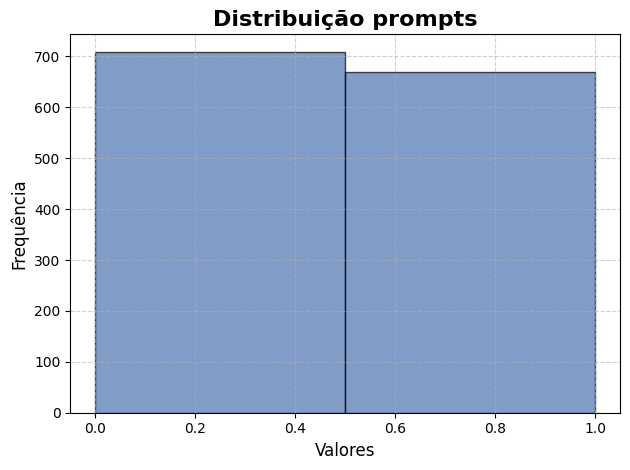

prompt_id
0    708
1    670
Name: count, dtype: int64


In [22]:
plt.hist(train_essays['prompt_id'], bins=2, color='#4c72b0', edgecolor='black', alpha=0.7)
plt.title('Distribuição prompts', fontsize=16, fontweight='bold')
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(train_essays['prompt_id'].value_counts())


In [25]:
url = "http://localhost:11434/api/generate"
data = {
    "model": "llama3.2:latest",
    "prompt": "",
    "stream": False
}

In [ ]:
data['prompt'] = prompt_1
print(data)
teste = data['prompt'] + f" Use {281} as a random token to generate a different text"
print(teste)

In [26]:
llm_essays_1 = []
llm_essays_2 = []
data['prompt'] = prompt_1
for i in range(0,708):
    data['prompt'] += f" Use {i} as a random token to generate a different text"
    response = requests.post(url, data=json.dumps(data), headers={"Content-Type": "application/json"})

    if response.status_code == 200:
        result = response.json()
        print(result['response']) 
    else:
        print("Erro:", response.status_code, response.text)

O aprendizado por reforço é um método fundamental da inteligência artificial e do aprendizado computacional, utilizado para que os sistemas aprendam a tomar decisões ou a realizar tarefas com base nas suas interações com o ambiente.

**Definição:**

O aprendizado por reforço é um processo em que um agente (um sistema) aprende a tomar ações em um ambiente para maximizar um objetivo, como ganhar pontos, obter uma punição ou evitar uma penalidade. O aprendizado ocorre à medida que o agente recebe feedback sobre suas ações, em forma de recompensas positivas ou negativas.

**Componentes do aprendizado por reforço:**

1. **Agente**: O sistema que está aprendendo e tomando ações no ambiente.
2. **Ambiente**: O contexto em que o agente opera e recebe feedback.
3. **Ações**: As escolhas que o agente pode tomar no ambiente.
4. **Recompensas**: Os feedbacks que o agente recebe sobre suas ações, que podem ser positivas ou negativas.

**Tipos de reforço:**

1. **Reforço positivo (positivo)**: O age